## Aprendizaje Supervisado
Comparación de modelos


In [ ]:
pip install pandas-profiling

In [ ]:
# Data handling
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
import scipy.stats as st
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc , precision_score
from sklearn.feature_selection import SelectKBest

In [ ]:
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
# EDA (pandas-profiling, etc. )

import ydata_profiling as pp
# Feature Processing (Scikit-learn processing, etc. )
import sklearn
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...
# Other packages
import os, pickle
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# For CSV, use pandas.read_csv
df = pd.read_csv(r"Telco-Customer-Churn.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [ ]:
# Use pandas_profiling.ProfileReport method
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#check the number of columns  and rows
df.shape

(7043, 21)

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
#Check missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Check duplicates
df.duplicated().sum()

0

In [ ]:
# convert string values 'yes' and 'no' to numeric values '1' and '0' in churn column because of our ML model
df.loc[df.Churn == 'Yes','Churn'] = 1
df.loc[df.Churn == 'No','Churn'] = 0

In [ ]:
# convert string values 'Female' and 'Male' to numeric values '1' and '0' in gender column
df.loc[df.gender == 'Female','gender'] = 1
df.loc[df.gender == 'Male','gender'] = 0

In [ ]:
# convert 'No internet service' to 'No' for columns 'OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTv'
cols = ['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV']
for i in cols :
    df[i] = df[i].replace({'No internet service': 'No'})

In [ ]:
#Replace 'No internet service' and 'No phone service' with 'No'
df.replace(['No internet service','No phone service'], 'No', inplace=True)

In [ ]:
#Replaces the spaces with null values
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
#Drop the null value feature which contain .50% missing values
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]
#Convert 'TotalCharges' column to float datatype
df['TotalCharges'] = df["TotalCharges"].astype(float)
# value count on 'Churn'  #Distribution of target column
df["Churn"].value_counts().values

array([5163, 1869])

In [ ]:
#visualizing the total customer churn
churn_labels = df["Churn"].value_counts().keys().tolist()
churn_values = df["Churn"].value_counts().values.tolist()
plot_data = [go.Pie(labels=churn_labels,
                    values=churn_values,
                    marker=dict(colors=['grey','orange'], line=dict(color="purple",width=1.5)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole= .6)
            ]
plot_layout = go.Layout(dict(title="Customer Churn",
                             plot_bgcolor='rgb(243,243,243)',
                             paper_bgcolor='rgb(243,243,243)'))
fig = go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<Axes: xlabel='Churn', ylabel='count'>

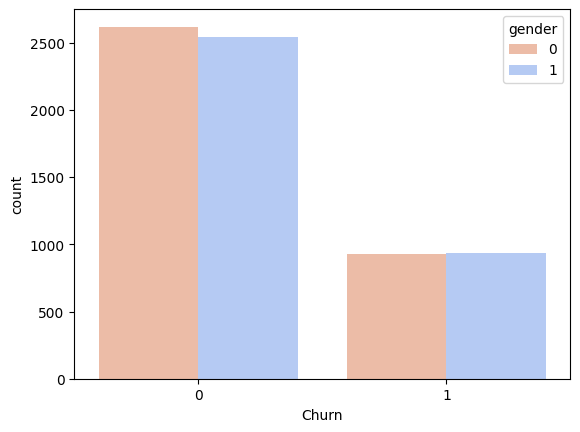

In [ ]:
sns.countplot(x='Churn',data=df,hue='gender',palette="coolwarm_r")

In [ ]:
#visualize churn by gender
plot_by_gender = df.groupby('gender').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_gender['gender'],
    y=plot_by_gender['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Gender',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

In [ ]:
#visualize churn by TechSupport
plot_by_TechSupport = df.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_TechSupport['TechSupport'],
    y=plot_by_TechSupport['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by TechSupport',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

In [ ]:
#visualize churn by PaymentMethod
plot_by_PaymentMethod = df.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_PaymentMethod['PaymentMethod'],
    y=plot_by_PaymentMethod['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by PaymentMethod',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

In [ ]:
#visualize churn by InternetService
plot_by_InternetService = df.groupby('InternetService').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_InternetService['InternetService'],
    y=plot_by_InternetService['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by InternetService',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

In [ ]:
#visualize churn by Contract
plot_by_Contract = df.groupby('Contract').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_Contract['Contract'],
    y=plot_by_Contract['Churn'],
    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Contract',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

In [ ]:
#visualize churn by Tenure
plot_by_tenure = df.groupby('tenure').Churn.mean().reset_index()
plot_data = [go.Bar(
    x=plot_by_tenure['tenure'],
    y=plot_by_tenure['Churn'],

    width=[0.3, 0.3],
    marker=dict(color=['red','purple'])
)]
plot_layout = go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn"},
    title='Churn by Tenure',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig = go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

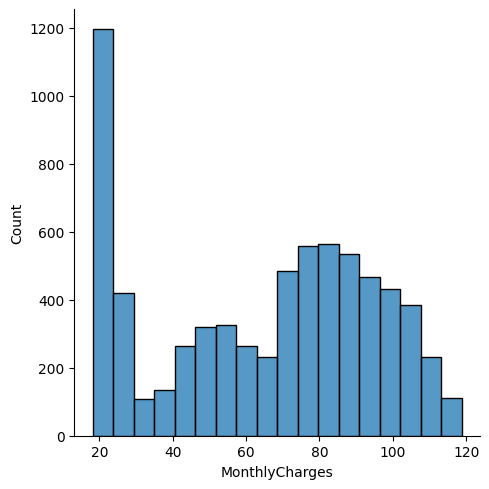

In [ ]:
# visualize the distribution of 'MonthlyCharges'
sns.displot(df, x=df.MonthlyCharges)

In [ ]:
df['security_backup'] = df.OnlineSecurity + df.OnlineBackup
df['security_backup'] = df.security_backup.replace({2:1})


<Axes: title={'center': 'security_backup = NoNo'}, xlabel='tenure', ylabel='MonthlyCharges'>

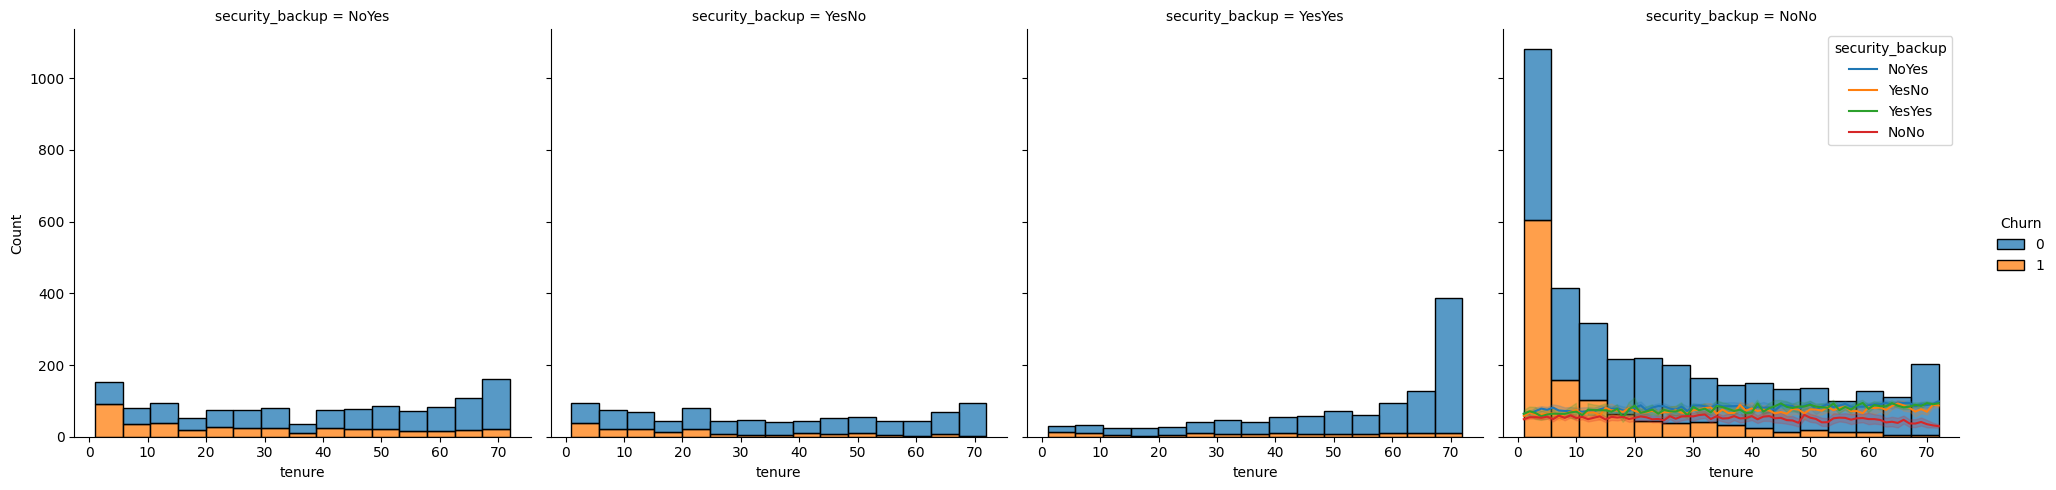

In [ ]:
sns.displot(df,x='tenure',col='security_backup',hue='Churn',multiple='stack')
sns.lineplot(x='tenure', y='MonthlyCharges',hue='security_backup',data=df )

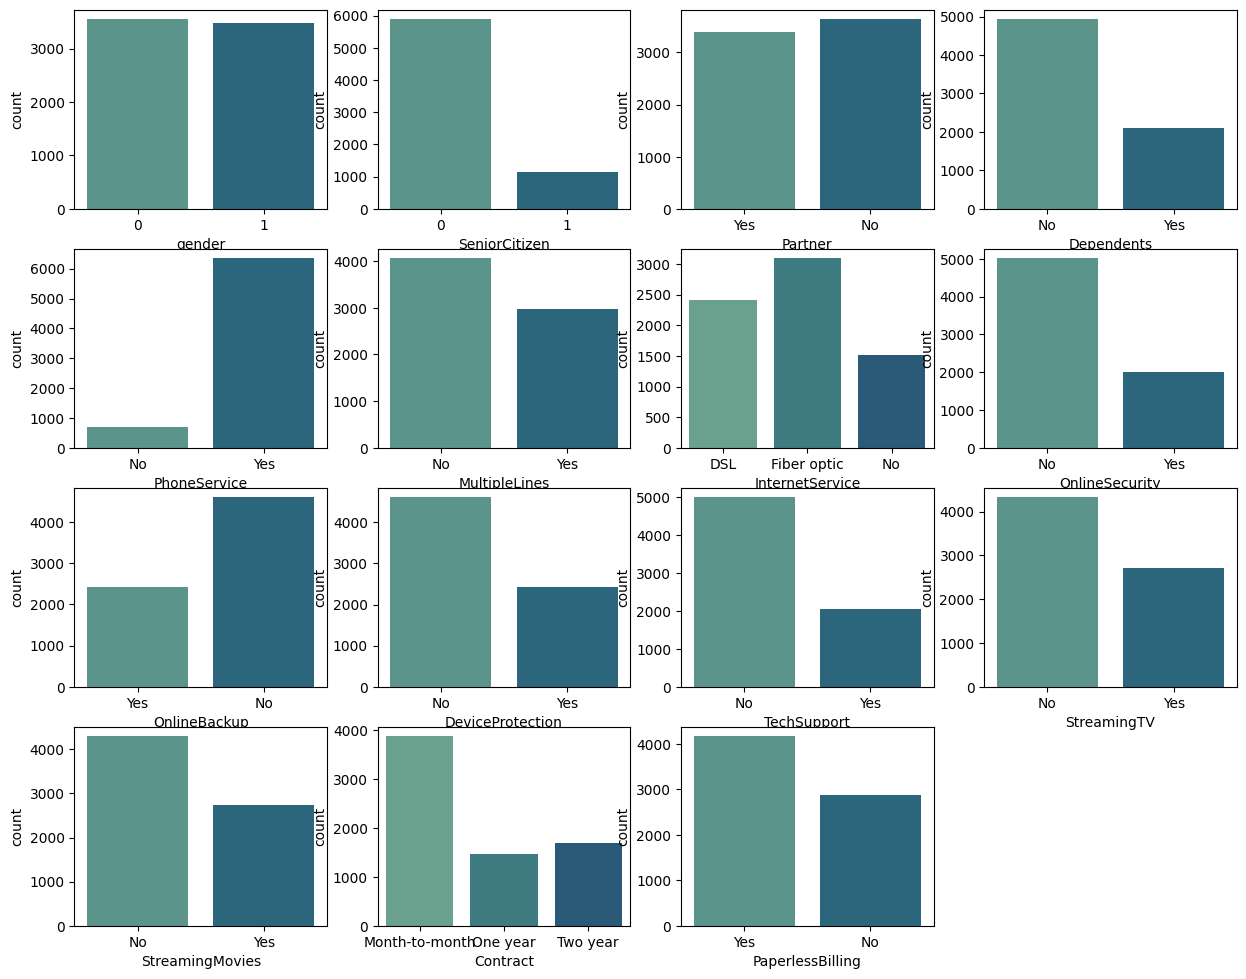

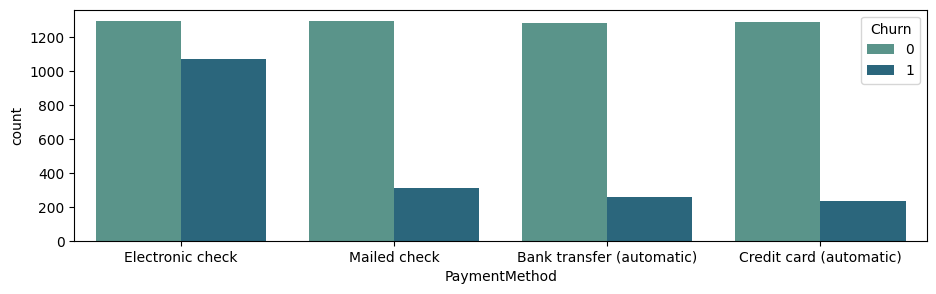

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualizing Categorical features
#countplot
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling']


plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show()
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=df, palette='crest')
plt.show()
plt.tight_layout()


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

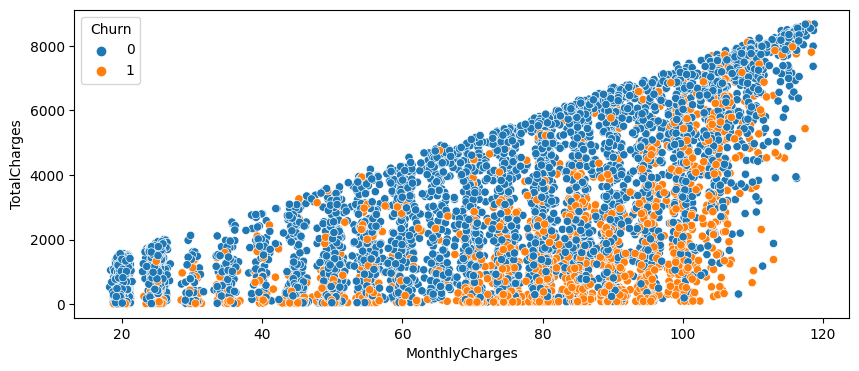

In [ ]:
# Plot ‘MonthlyCharges’ vs ‘TotalCharges’
# Scatter plot
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

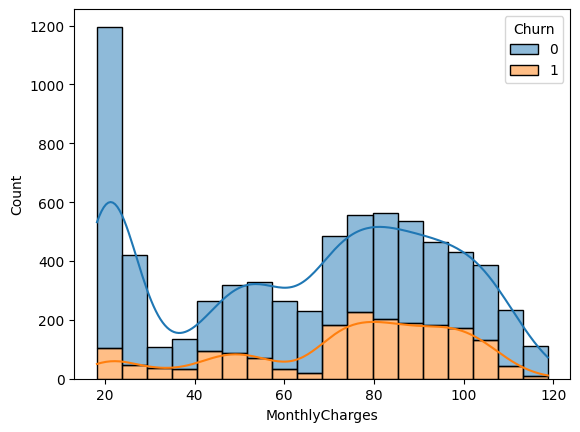

In [ ]:
# Using a Histogram, visualize monthly charges and churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.show()

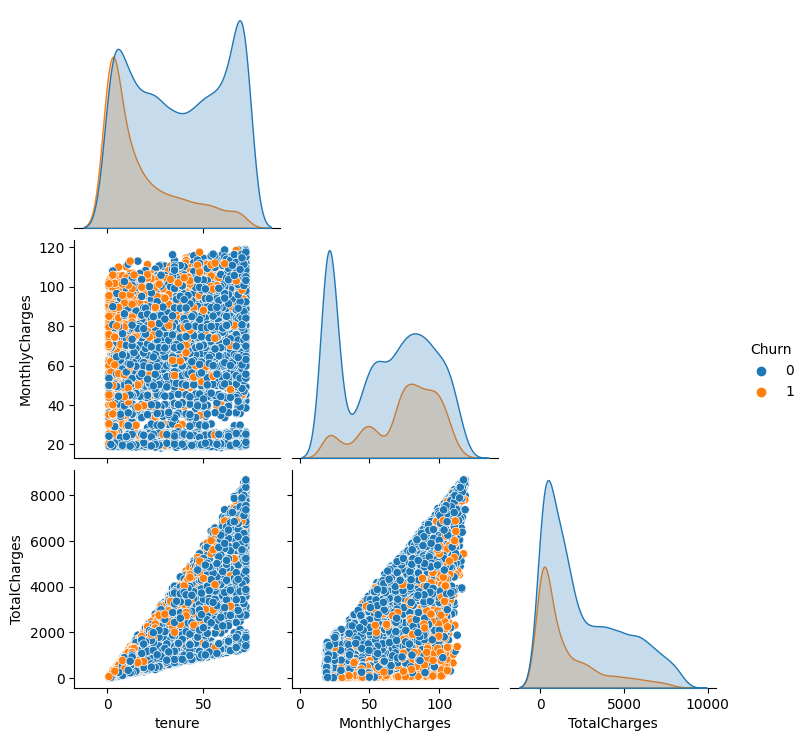

In [ ]:
# Check the correlation between numerical features and target variable
# Numerical feature = 'tenure', 'MonthlyCharges', 'TotalCharges'
# Target variable = 'Churn'

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df[numerical_cols + ['Churn']]
sns.pairplot(df_num, hue='Churn', corner=True)
plt.show()


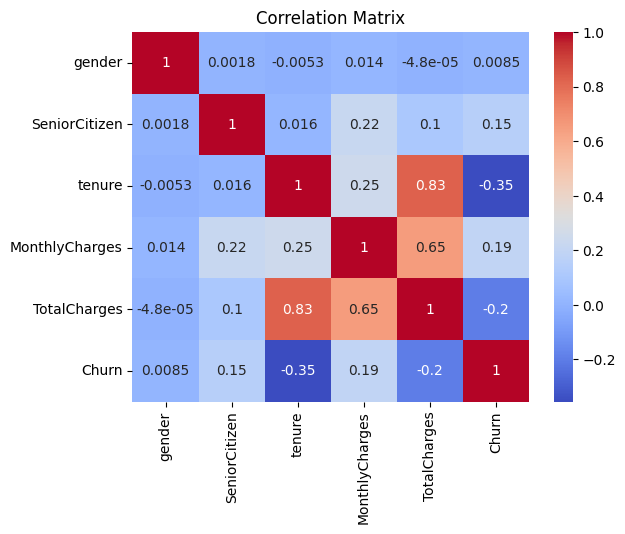

In [ ]:
# Check the correlation matrix of all features
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Columns to be one-hot encoded
columns_to_encode = [ 'gender', 'DeviceProtection', 'MultipleLines', 'InternetService',
                     'OnlineBackup', 'OnlineSecurity', 'PaymentMethod', 'SeniorCitizen', 'StreamingMovies',
                     'StreamingTV', 'TechSupport']
#columns_to_encode = [ 'gender', 'DeviceProtection', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport']

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(pd.DataFrame(df)[columns_to_encode])
# Create a new DataFrame with one-hot encoded columns
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(columns_to_encode))
print(df)
print(df_onehot)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG       1              0     Yes         No       1   
1     5575-GNVDE       0              0      No         No      34   
2     3668-QPYBK       0              0      No         No       2   
3     7795-CFOCW       0              0      No         No      45   
4     9237-HQITU       1              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB       0              0     Yes        Yes      24   
7028  2234-XADUH       1              0     Yes        Yes      72   
7029  4801-JZAZL       1              0     Yes        Yes      11   
7030  8361-LTMKD       0              1     Yes         No       4   
7031  3186-AJIEK       0              0      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No            No             DSL             No  ...   
1             Yes

In [ ]:
from sklearn.preprocessing import StandardScaler

# The columns to perform feature scaling on are 'tenure','MonthlyCharges' to have them on one scale
Cols_ft_scaling = ['tenure','MonthlyCharges']
# Perform feature scaling on the dataset using the fit_transform method
StandardScaler = StandardScaler()
scaled_features = StandardScaler.fit_transform(df[Cols_ft_scaling])


In [ ]:
# Creating a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=Cols_ft_scaling)


In [ ]:
print(df_scaled)


        tenure  MonthlyCharges
0    -1.280248       -1.161694
1     0.064303       -0.260878
2    -1.239504       -0.363923
3     0.512486       -0.747850
4    -1.239504        0.196178
...        ...             ...
7027 -0.343137        0.664868
7028  1.612573        1.276493
7029 -0.872808       -1.170004
7030 -1.158016        0.319168
7031  1.368109        1.357932

[7032 rows x 2 columns]


In [ ]:
df_con=pd.concat([df_onehot, df_scaled], axis=1)
df_con

gender_0  gender_1  DeviceProtection_No  DeviceProtection_Yes  \
0          0.0       1.0                  1.0                   0.0   
1          1.0       0.0                  0.0                   1.0   
2          1.0       0.0                  1.0                   0.0   
3          1.0       0.0                  0.0                   1.0   
4          0.0       1.0                  1.0                   0.0   
...        ...       ...                  ...                   ...   
7027       1.0       0.0                  0.0                   1.0   
7028       0.0       1.0                  0.0                   1.0   
7029       0.0       1.0                  1.0                   0.0   
7030       1.0       0.0                  1.0                   0.0   
7031       1.0       0.0                  0.0                   1.0   

      MultipleLines_No  MultipleLines_Yes  InternetService_DSL  \
0                  1.0                0.0                  1.0   
1                  1.0                0.0                  1.0   
2                  1.0                0.0                  1.0   
3                  1.0                0.0                  1.0   
4                  1.0                0.0                  0.0   
...                ...                ...                  ...   
7027               0.0                1.0                  1.0   
7028               0.0                1.0                  0.0   
7029               1.0                0.0                  1.0   
7030               0.0                1.0                  0.0   
7031               1.0                0.0                  0.0   

      InternetService_Fiber optic  InternetService_No  OnlineBackup_No  ...  \
0                             0.0                 0.0              0.0  ...   
1                             0.0                 0.0              1.0  ...   
2                             0.0                 0.0              0.0  ...   
3                             0.0                 0.0              1.0  ...   
4                             1.0                 0.0              1.0  ...   
...                           ...                 ...              ...  ...   
7027                          0.0                 0.0              1.0  ...   
7028                          1.0                 0.0              0.0  ...   
7029                          0.0                 0.0              1.0  ...   
7030                          1.0                 0.0              1.0  ...   
7031                          1.0                 0.0              1.0  ...   

      SeniorCitizen_0  SeniorCitizen_1  StreamingMovies_No  \
0                 1.0              0.0                 1.0   
1                 1.0              0.0                 1.0   
2                 1.0              0.0                 1.0   
3                 1.0              0.0                 1.0   
4                 1.0              0.0                 1.0   
...               ...              ...                 ...   
7027              1.0              0.0                 0.0   
7028              1.0              0.0                 0.0   
7029              1.0              0.0                 1.0   
7030              0.0              1.0                 1.0   
7031              1.0              0.0                 0.0   

      StreamingMovies_Yes  StreamingTV_No  StreamingTV_Yes  TechSupport_No  \
0                     0.0             1.0              0.0             1.0   
1                     0.0             1.0              0.0             1.0   
2                     0.0             1.0              0.0             1.0   
3                     0.0             1.0              0.0             0.0   
4                     0.0             1.0              0.0             1.0   
...                   ...             ...              ...             ...   
7027                  1.0             0.0              1.0             0.0   
7028                  1.0             0.0 

In [ ]:
# Create a DataFrame with scaled and encoded features
df_processed = pd.concat([df_scaled, df_onehot], axis=1)

In [ ]:
print(df_processed.columns)

Index(['tenure', 'MonthlyCharges', 'gender_0', 'gender_1',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'TechSupport_No', 'TechSupport_Yes'],
      dtype='object')


In [ ]:

df["Churn"].value_counts().values


array([5163, 1869])

In [ ]:
# Assigning all the feature columns to variable x and target to variable y
y = df['Churn']


X = df_processed


In [ ]:
X.shape


(7032, 27)

In [ ]:
y.shape

(7032,)

In [ ]:

# Use train_test_split with a random_state, and add stratify for Classification
# Split the dataset into Train set as 80% and Test set as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 27)
(1407, 27)
(5625,)
(1407,)


In [ ]:
X_train

tenure  MonthlyCharges  gender_0  gender_1  DeviceProtection_No  \
3451 -1.280248       -1.505733       0.0       1.0                  1.0   
611   1.368109       -1.470830       1.0       0.0                  1.0   
588   1.571829        0.851015       1.0       0.0                  0.0   
2680  1.612573        1.191729       0.0       1.0                  0.0   
1544 -1.280248       -0.629847       1.0       0.0                  1.0   
...        ...             ...       ...       ...                  ...   
905  -0.546857        0.018342       1.0       0.0                  1.0   
5192  1.531085        1.386186       0.0       1.0                  0.0   
3980 -0.872808        0.388973       0.0       1.0                  1.0   
235  -1.239504       -0.345641       1.0       0.0                  1.0   
5157 -1.280248        0.161276       1.0       0.0                  1.0   

      DeviceProtection_Yes  MultipleLines_No  MultipleLines_Yes  \
3451                   0.0               1.0                0.0   
611                    0.0               1.0                0.0   
588                    1.0               0.0                1.0   
2680                   1.0               0.0                1.0   
1544                   0.0               1.0                0.0   
...                    ...               ...                ...   
905                    0.0               1.0                0.0   
5192                   1.0               0.0                1.0   
3980                   0.0               0.0                1.0   
235                    0.0               0.0                1.0   
5157                   0.0               1.0                0.0   

      InternetService_DSL  InternetService_Fiber optic  ...  \
3451                  0.0                          0.0  ...   
611                   0.0                          0.0  ...   
588                   1.0                          0.0  ...   
2680                  0.0                          1.0  ...   
1544                  1.0                          0.0  ...   
...                   ...                          ...  ...   
905                   1.0                          0.0  ...   
5192                  0.0                          1.0  ...   
3980                  0.0                          1.0  ...   
235                   1.0                          0.0  ...   
5157                  0.0                          1.0  ...   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
3451                             0.0                         1.0   
611                              0.0                         1.0   
588                              1.0                         0.0   
2680                             0.0                         0.0   
1544                             0.0                         1.0   
...                              ...                         ...   
905                              0.0                         0.0   
5192                             1.0                         0.0   
3980                             1.0                         0.0   
235                              0.0                         1.0   
5157                             1.0                         0.0   

      SeniorCitizen_0  SeniorCitizen_1  StreamingMovies_No  \
3451              1.0              0.0                 1.0   
611               1.0              0.0                 1.0   
588               1.0              0.0                 0.0   
2680              1.0              0.0                 1.0   
1544              1.0              0.0                 1.0   
...               ...              ...                 ...   
905               1.0              0.0                 0.0   
5192              1.0              0.0                 0.0   
3980              1.0              0.0                 1.0   
235               1.0              0.0                 1.0   
5157              0.0              1.0        

**Regresión Logística:**

In [ ]:
# Construimos el pipeline con la selección de variables, la estandarización y la regresión logística con regularización L2
pipe = Pipeline([
        ('classifier', LogisticRegression(penalty='l2', random_state = 99))
])

# Definimos los parámetros a validar en la Gridsearch
parameters = {
    'classifier__C': [10**x for x in range(-5, 3)]
}

# Realizamos la validación cruzada Gridsearch para encontrar el mejor valor de C
grid_search = GridSearchCV(pipe, parameters, cv=3,verbose=10, n_jobs=-1, scoring='roc_auc') #Buscamos maximizar roc_auc
grid_search.fit(X_train, y_train)

# Obtenemos el mejor valor de C y el modelo con ese valor
best_C = grid_search.best_params_['classifier__C']
best_model_lr = grid_search.best_estimator_

# Evaluamos el modelo en el conjunto de prueba y calculamos el AUC-ROC, F1-score y Precision-Score
y_pred = best_model_lr.predict(X_test)

auc_roc_lr = round(roc_auc_score(y_test, y_pred)*100,2)
f1_lr = round(f1_score(y_test, y_pred)*100,2)
precision_lr = round(precision_score(y_test, y_pred)*100,2)
accuracy_lr= round(accuracy_score(y_test,y_pred)*100,2)

print(f"Mejor valor de C: {best_C}")
print(f"AUC-ROC: {auc_roc_lr}")
print(f"F1-score: {f1_lr}")
print(f"Precision-score: {precision_lr}")
print(f"Accuracy: {accuracy_lr}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejor valor de C: 100
AUC-ROC: 69.72
F1-score: 55.54
Precision-score: 62.46
Accuracy: 79.18


In [ ]:
ConfusionMatrix_logreg = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix_logreg)

[[931 110]
 [183 183]]


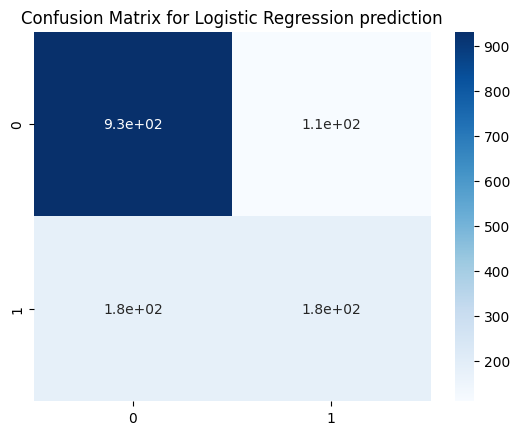

In [ ]:
matrix_logreg=sns.heatmap(ConfusionMatrix_logreg,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression prediction')
plt.show(matrix_logreg)
plt.show()

**Random Forest:**

In [ ]:
# Construimos el pipeline con la selección de variables y Random Forest
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state = 99))
])

# Definimos los parámetros a validar en la Gridsearch
parameters = {
    'classifier__n_estimators': [100,200, 250],
     'classifier__max_leaf_nodes': [20,10]
}


# Realizamos la validación cruzada Gridsearch para encontrar los mejores valores para el número de estimadores y el máximo número de hojas
grid_search = GridSearchCV(pipe, parameters, cv=3,verbose=10, n_jobs=-1, scoring='roc_auc') #Buscamos maximizar roc_auc
grid_search.fit(X_train, y_train)

# Obtenemos los mejores valores para el número de estimadores y el máximo número de hojas y el modelo con esos valores
best_n_estimators = grid_search.best_params_['classifier__n_estimators']
best_max_leaf_nodes = grid_search.best_params_['classifier__max_leaf_nodes']
best_model_rf = grid_search.best_estimator_

# Evaluamos el modelo en el conjunto de prueba y calculamos el AUC-ROC, F1-score y la Precision y Accuracy
y_pred = best_model_rf.predict(X_test)

auc_roc_rf = round(roc_auc_score(y_test, y_pred)*100,2)
f1_rf = round(f1_score(y_test, y_pred)*100,2)
precision_rf = round(precision_score(y_test, y_pred)*100,2)
accuracy_rf= round(accuracy_score(y_test,y_pred)*100,2)

print(f"Mejor valor para el número de estimadores: {best_n_estimators}")
print(f"Mejor valor para el máximo número de hojas: {best_max_leaf_nodes}")
print(f"AUC-ROC: {auc_roc_rf}")
print(f"F1-score: {f1_rf}")
print(f"Precision-score: {precision_rf}")
print(f"Accuracy: {accuracy_rf}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Mejor valor para el número de estimadores: 250
Mejor valor para el máximo número de hojas: 20
AUC-ROC: 67.23
F1-score: 51.37
Precision-score: 68.81
Accuracy: 79.82


[[973  68]
 [216 150]]


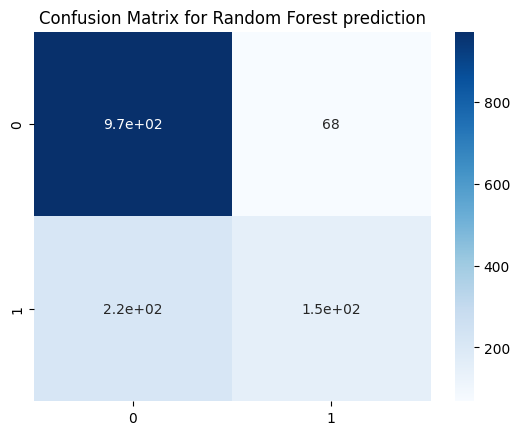

In [ ]:
ConfusionMatrix_rf = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix_rf)
matrix_rf=sns.heatmap(ConfusionMatrix_rf,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest prediction')
plt.show(matrix_rf)
plt.show()

**XgBoost:**

In [ ]:
# Construimos el pipeline con la selección de variables y XGBoost
pipe = Pipeline([
    ('classifier', XGBClassifier(random_state = 99))
])

# Definimos los parámetros a validar en la Gridsearch
parameters = {
    'classifier__n_estimators': [200,250],
    'classifier__max_depth': [30,40],
    'classifier__learning_rate': [0.05, 0.1]
}

# Realizamos la validación cruzada Gridsearch para encontrar los mejores valores para el número de estimadores, la máxima profundidad del árbol y learning_rate
grid_search = GridSearchCV(pipe, parameters, cv=3,verbose=10, n_jobs=-1, scoring='roc_auc') #Buscamos maximizar roc_auc
grid_search.fit(X_train, y_train)


# Obtenemos los mejores valores para los parámetros y el modelo con esos valores
best_n_estimators = grid_search.best_params_['classifier__n_estimators']
best_max_depth = grid_search.best_params_['classifier__max_depth']
best_learning_rate = grid_search.best_params_['classifier__learning_rate']
best_model_xgb = grid_search.best_estimator_

# Evaluamos el modelo en el conjunto de prueba y calculamos el AUC-ROC, F1-score, Precision y Accuracy
y_pred = best_model_xgb.predict(X_test)

auc_roc_xgb = round(roc_auc_score(y_test, y_pred)*100,2)
f1_xgb = round(f1_score(y_test, y_pred)*100,2)
precision_xgb = round(precision_score(y_test, y_pred)*100,2)
accuracy_xgb= round(accuracy_score(y_test,y_pred)*100,2)

print(f"Mejor valor para el número de estimadores: {best_n_estimators}")
print(f"Mejor valor para la máxima profundidad del árbol: {best_max_depth}")
print(f"Mejor valor para learning_rate: {best_learning_rate}")
print(f"AUC-ROC: {auc_roc_xgb}")
print(f"F1-score: {f1_xgb}")
print(f"Precision-score: {precision_xgb}")
print(f"Accuracy: {accuracy_xgb}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejor valor para el número de estimadores: 200
Mejor valor para la máxima profundidad del árbol: 30
Mejor valor para learning_rate: 0.05
AUC-ROC: 69.59
F1-score: 55.24
Precision-score: 60.13
Accuracy: 78.46


[[917 124]
 [179 187]]


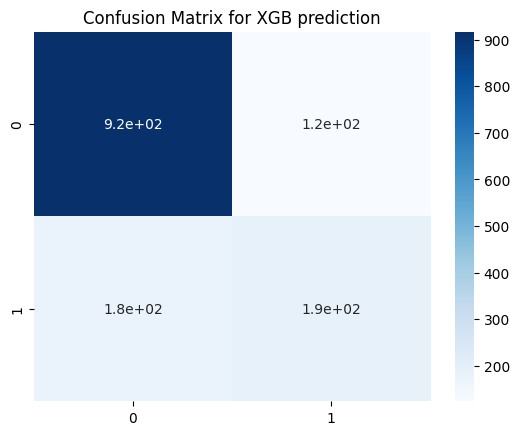

In [ ]:
ConfusionMatrix_xgb = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix_xgb)
matrix_xgb=sns.heatmap(ConfusionMatrix_xgb,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGB prediction')
plt.show(matrix_xgb)
plt.show()

**Probamos con el método LightGBM:**

In [ ]:
from lightgbm import LGBMClassifier
# Construimos el pipeline con la selección de variables y XGBoost
pipe = Pipeline([
    ('classifier', LGBMClassifier(random_state = 99))
])

# Definimos los parámetros a validar en la Gridsearch
parameters = {
    'classifier__n_estimators': [200,250],
    'classifier__max_depth': [30,40],
    'classifier__learning_rate': [0.05, 0.1]
}

# Realizamos la validación cruzada Gridsearch para encontrar los mejores valores para el número de estimadores, la máxima profundidad del árbol y learning_rate
grid_search = GridSearchCV(pipe, parameters,  cv=3,verbose=10, n_jobs=-1, scoring='roc_auc') #Buscamos maximizar roc_auc
grid_search.fit(X_train, y_train)

# Obtenemos los mejores valores para los parámetros y el modelo con esos valores
best_n_estimators = grid_search.best_params_['classifier__n_estimators']
best_max_depth = grid_search.best_params_['classifier__max_depth']
best_learning_rate = grid_search.best_params_['classifier__learning_rate']
best_model_lgb = grid_search.best_estimator_

# Evaluamos el modelo en el conjunto de prueba y calculamos el AUC-ROC, F1-score, Precision y Accuracy
y_pred = best_model_lgb.predict(X_test)

auc_roc_lgb = round(roc_auc_score(y_test, y_pred)*100,2)
f1_lgb = round(f1_score(y_test, y_pred)*100,2)
precision_lgb = round(precision_score(y_test, y_pred)*100,2)
accuracy_lgb= round(accuracy_score(y_test,y_pred)*100,2)


print(f"Mejor valor para el número de estimadores: {best_n_estimators}")
print(f"Mejor valor para la máxima profundidad del árbol: {best_max_depth}")
print(f"Mejor valor para learning_rate: {best_learning_rate}")
print(f"AUC-ROC: {auc_roc_lgb}")
print(f"F1-score: {f1_lgb}")
print(f"Precision-score: {precision_lgb}")
print(f"Accuracy: {accuracy_lgb}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1503, number of negative: 4122
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267200 -> initscore=-1.008875
[LightGBM] [Info] Start training from score -1.008875
[LightGBM] [Warning] Accuracy may be bad si

[[929 112]
 [185 181]]


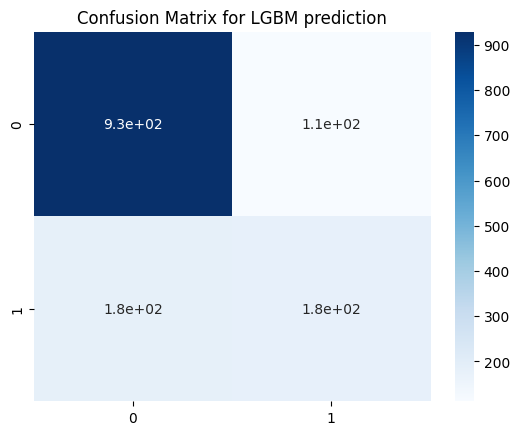

In [ ]:
ConfusionMatrix_lgb = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix_lgb)
matrix_lgb=sns.heatmap(ConfusionMatrix_lgb,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LGBM prediction')
plt.show(matrix_lgb)
plt.show()

**Creamos una tabla con todos los resultados obtenidos con los métodos probados:**

In [ ]:
df_funciones = pd.DataFrame()
df_funciones["metodo"] = ["regresion logistica", "random forest", "xgboost", "light_gbm"]
df_funciones["auc_roc"] = [auc_roc_lr , auc_roc_rf , auc_roc_xgb, auc_roc_lgb]
df_funciones["f1_score"] = [f1_lr , f1_rf , f1_xgb, f1_lgb]
df_funciones["precision_score"] = [precision_lr , precision_rf , precision_xgb, precision_lgb]
df_funciones["accuracy"] = [accuracy_lr , accuracy_rf , accuracy_xgb, accuracy_lgb]

print(df_funciones)

                metodo  auc_roc  f1_score  precision_score  accuracy
0  regresion logistica    69.72     55.54            62.46     79.18
1        random forest    67.23     51.37            68.81     79.82
2              xgboost    69.59     55.24            60.13     78.46
3            light_gbm    69.35     54.93            61.77     78.89


##Curva ROC

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


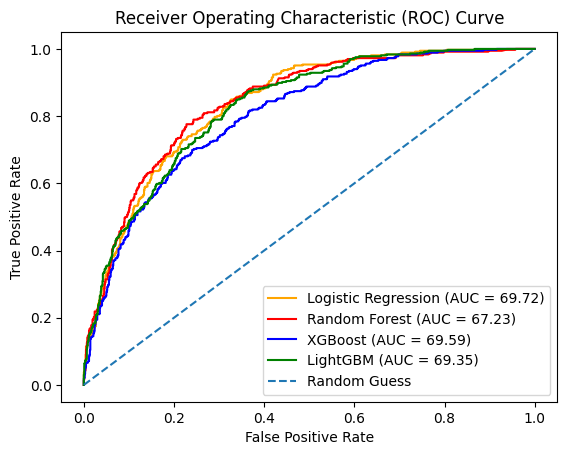

In [ ]:
# Calculamos las probabilidades predichas
lr_prob = best_model_lr.predict_proba(X_test)[:, 1]
rf_prob = best_model_rf.predict_proba(X_test)[:, 1]
xgb_prob = best_model_xgb.predict_proba(X_test)[:, 1]
lgb_prob = best_model_lgb.predict_proba(X_test)[:, 1]

# Calculamos las tasas de verdaderos positivos y falsos positivos
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_prob)
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_prob)

# Graficamos la curva ROC de cada modelo
plt.plot(lr_fpr, lr_tpr, color='orange',label=f'Logistic Regression (AUC = {auc_roc_lr:.2f})')
plt.plot(rf_fpr, rf_tpr,color='red', label=f'Random Forest (AUC = {auc_roc_rf:.2f})')
plt.plot(xgb_fpr, xgb_tpr,color='blue', label=f'XGBoost (AUC = {auc_roc_xgb:.2f})')
plt.plot(lgb_fpr, lgb_tpr,color='green',label=f'LightGBM (AUC = {auc_roc_lgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()